In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def sample_ball(n_points, n_dim=3):
    X = np.empty([n_points, n_dim])
    for i in range(0, n_points):
        u = np.random.normal(0, 1, n_dim + 2)
        norm = np.sum(u ** 2) ** 0.5
        u = u / norm
        X[i] = (u[0:n_dim])
    return pd.DataFrame(X)


def sample_sphere(n_points, n_dim=3, norm_mult=1.0):
    vec = np.random.randn(n_dim, n_points)
    vec /= np.linalg.norm(vec, axis=0)*norm_mult
    return pd.DataFrame(vec.T)


DIMENSIONS = 100
POINTS = 1000

ball = sample_ball(n_points=POINTS, n_dim=DIMENSIONS)
ball['labels'] = np.full([POINTS, 1], 0)
sphere1 = sample_sphere(n_points=POINTS, n_dim=DIMENSIONS, norm_mult=0.75)
sphere1['labels'] = np.full([POINTS, 1], 1)
sphere2 = sample_sphere(n_points=POINTS, n_dim=DIMENSIONS, norm_mult=0.5)
sphere2['labels'] = np.full([POINTS, 1], 2)

df = pd.concat([ball, sphere1, sphere2], ignore_index=True)
df.to_csv("./ball.csv", header=False, index=False)

if DIMENSIONS == 2:
    plt.scatter(ball.iloc[:, 0], ball.iloc[:, 1], s=10, marker='.')
    plt.scatter(sphere1.iloc[:, 0], sphere1.iloc[:, 1], s=10, marker='.')
    plt.scatter(sphere2.iloc[:, 0], sphere2.iloc[:, 1], s=10, marker='.')

if DIMENSIONS == 3:
    ax = plt.axes(projection='3d')
    ax.scatter3D(ball.iloc[:, 0], ball.iloc[:, 1], ball.iloc[:, 2])
    ax.scatter3D(sphere1.iloc[:, 0], sphere1.iloc[:, 1], sphere1.iloc[:, 2])
    ax.scatter3D(sphere2.iloc[:, 0], sphere2.iloc[:, 1], sphere2.iloc[:, 2])

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
def set_dataframe_columns(dataframe: pd.DataFrame) -> None:
    # set up dataset columns id
    columns = []
    for i in range(0, dataframe.shape[1] - 1):
        columns.append("col{}".format(i))
    columns.append("label")
    dataframe.columns = columns


def draw_2d_sns(X, Y, labels):
    df = pd.DataFrame()
    df["X"] = X
    df["Y"] = Y
    df["labels"] = labels

    df_main = df[df["labels"] != 10]
    color_palette = sns.color_palette("muted", len(df_main["labels"].unique()))

    sns.scatterplot(
        x="X",
        y="Y",
        hue="labels",
        palette=color_palette,
        data=df_main,
        legend="full",
        alpha=0.8,
        edgecolor=None,
    )

    df_border = df[df["labels"] == 10]
    color_palette = sns.color_palette("muted", 1)
    color_palette[-1] = (0.0, 0.0, 0.0)

    sns.scatterplot(
        x="X",
        y="Y",
        hue="labels",
        palette=color_palette,
        data=df_border,
        legend="full",
        alpha=0.8,
        edgecolor=None,
    )

    plt.legend(loc="right", markerscale=3.0, fontsize=16)

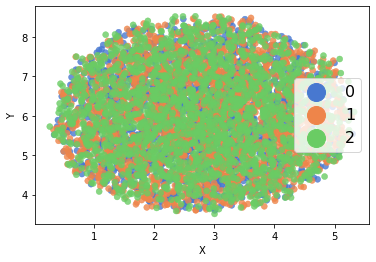

In [5]:
import pandas as pd
import umap.plot

X = pd.read_csv("./ball.csv", header=None, index_col=None)

set_dataframe_columns(X)
labels = X["label"]
X = X.drop(labels=["label"], axis=1)

mapper = umap.UMAP()
embedding = mapper.fit_transform(X)

draw_2d_sns(embedding[:,0], embedding[:,1], labels)
plt.show()

/Users/bartoszminch/miniconda3/envs/viskit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bartoszminch/miniconda3/envs/viskit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


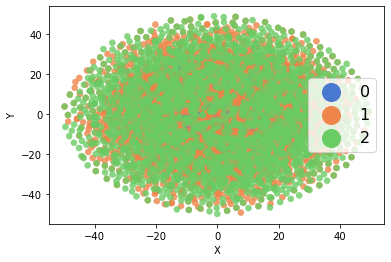

In [6]:
from sklearn.manifold import TSNE

mapper = TSNE(n_components=2, n_iter=2000)
embedding = mapper.fit_transform(X)

draw_2d_sns(embedding[:,0], embedding[:,1], labels)
plt.show()

Generating kNN graph...
Searching...
Finished.


0:00:00.031444


b'[Info] [CSV Parser] Loading dataset from file: /Users/bartoszminch/Documents/Repositories/viskit/python/viskit/input_data.csv'
b'[Info] [CSV Parser] Loading dataset from file: /Users/bartoszminch/Documents/Repositories/viskit/python/viskit/input_labels.csv'
b'[Info] [CSV Parser] Labels file passed.'
b'[Info] [CSV Parser] Dataset size: 6000'
b'[Info] [CSV Parser] Dataset dimensionality: 100'
b'[Info] [CSV Parser] Number of classes in dataset: 3'
b'[Info] [CSV Parser] Finished.'
b'[Info] [Graph] Loading graph from cache...'
b'[Info] [Graph] Finished.'
b'[Info] [kNN Generator] Determining random neighbors...'
b'[Info] [kNN Generator] Finished.'
b'[Info] [kNN Generator] Neighbors in graph: 18000'
b'Step: 0'
b'Step: 100'
b'Step: 200'
b'Step: 300'
b'Step: 400'
b'Step: 500'
b'Step: 600'
b'Step: 700'
b'Step: 800'
b'Step: 900'
b'Step: 1000'
b'Step: 1100'
b'Step: 1200'
b'Step: 1300'
b'Step: 1400'
b'Step: 1500'
b'Step: 1600'
b'Step: 1700'
b'Step: 1800'
b'Step: 1900'
b'Step: 2000'
b'Step: 2100'


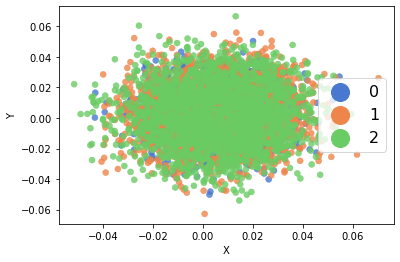

In [11]:
from viskit.embedding.ivhd import Ivhd

mapper = Ivhd(
    optimizer="force-directed",
    n_iter=2000,
    nn=2,
    rn=1,
    l1_steps=0,
    reverse_neighbors_steps=0,
    reverse_neighbors_count=0,
)

embedding, _ = mapper.fit_transform(X, labels)
draw_2d_sns(embedding[:,0], embedding[:,1], labels)
plt.show()

KeyboardInterrupt: 